# Project: Wrangling and Analyze Data

# Table of Contents
1. [Data Gathering](#dg)
2. [Assessing Data](#ad)
3. [Cleaning Data](#cd)
4. [Storing Data](#sd)
5. [Analyzing and Visualizing](#avd)

## Data Gathering 
<a id="dg"></a>
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
#importing packages
import pandas as pd 
import numpy as np 
import requests
import tweepy
import seaborn as sns
from timeit import default_timer as timer
import json
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#gathering 'twitter-archive-enhanced.csv' provided by Udacity
archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
#utilizing the request package to download 'image-predictions.tsv'
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
print(response)
with open ("img-pred.tsv", 'w') as file:
    file.write(response.text)

<Response [200]>


In [5]:
#reading the tsv content received from the above url 
img_pred = pd.read_csv('img-pred.tsv', sep = '\t')

In [6]:
#########################

In [7]:
#initiating programmating pulling of twitter via API
#storing twitter id into a variable to pull those tweets from twitter
tweet_id = archive_enhanced['tweet_id']

In [8]:
archive_enhanced.tweet_id.values

array([892420643555336193, 892177421306343426, 891815181378084864, ...,
       666033412701032449, 666029285002620928, 666020888022790149])

In [51]:
r= requests.get(url)

In [9]:
#removed consumer key and access key 


auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [10]:
#testing api pull for one tweet in below cells to figure out the steps 
start = timer()
tweet = api.get_status(892420643555336193)
tweet
end = timer()
time = end - start

In [11]:
time

0.236271416000001

In [12]:
type(tweet)

tweepy.models.Status

In [13]:
j = json.dumps(tweet._json)

In [14]:
with open('tweet.txt', 'w') as file:
    tweet_data =json.dump(tweet._json, file)
    file.close()

In [15]:
#pulling data for all the tweet ids from enhanced csv
count = 0
fails_dict = {}
fai =[]
fail_count = 0
start =timer()
with open('tweet.txt', 'w') as file:
    for x in tweet_id:
        count = +1
        try:  
            tweet = api.get_status(x)
            tweet_data = json.dump(tweet._json, file)
            file.write('\n')
        except:
            print("Fail")
            fail_count = +1
            fai = x
            
    file.close()
end = timer()
print(end-start)
print(fail_count)

Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail


Rate limit reached. Sleeping for: 703


Fail
Fail


Rate limit reached. Sleeping for: 717


1892.7308950420002
1


In [9]:
#reading data received from twitter
data = pd.read_json('tweet.txt', lines =True)
data.head()

,created_at,id,id_str,text,truncated,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,34362,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,True,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,29787,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,22415,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,37543,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,35863,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


### - At this point we have gathered all the data we need. We will initiate data assessment

## Assessing Data
<a id="ad"></a>
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [10]:
archive_enhanced.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [11]:
archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [12]:
img_pred.tail(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [13]:
img_pred.to_csv('img_pred.csv')

In [14]:
img_pred.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [15]:
img_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [16]:
img_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2328 entries, 0 to 2327
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2328 non-null   datetime64[ns, UTC]
 1   id                             2328 non-null   int64              
 2   id_str                         2328 non-null   int64              
 3   text                           2328 non-null   object             
 4   truncated                      2328 non-null   bool               
 5   entities                       2328 non-null   object             
 6   extended_entities              1815 non-null   object             
 7   source                         2328 non-null   object             
 8   in_reply_to_status_id          77 non-null     float64            
 9   in_reply_to_status_id_str      77 non-null     float64            
 10  in_reply_to_user_id     

In [19]:
data.shape

(2328, 30)

In [20]:
data.head(3)

,created_at,id,id_str,text,truncated,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,34362,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,True,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,29787,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,22415,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [21]:
#creating copy of the data obtained from twitter api 
twitter_data = data.copy()

In [22]:
#storing the data as csv
twitter_data.to_csv("twitter_data.csv")

In [23]:
twitter_data.head(1)

,created_at,id,id_str,text,truncated,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,34362,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


### Quality issues

Dataset - Twitter_data 


1. Remove unwanted columns 
2. has follower data in json format in one of the columns, we need to extract that information to create a separate column
3. We need to create bins to categorize and analyze followership of the account
4. The twitter_data has tweet id named as id we need to rename it to tweet_id so as to merge the data

Dataset - Twitter Archive Data - we rate dog

6. Remove retweet related rows 
7. Remove unwanted columns
8. The timestamp column has erroneous datatype
9. Fix Dog stages to readable format
    
Dataset - Image Predictions

8. Drop unwanted columns 
9. Fix column headers for prediction column to make it more relevant 
10. Improve consistency for dog breeds

### Tidiness issues
1. This project involves three datasets we will combine them to create one dataset
2. Combining the 4 columns ( dog stages to create one column)

## Cleaning Data
<a id="cd"></a>
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

### Data Set - twitter_data ( Data pulled programmatically from twitter via API
### Issue #1:
#### Define: Removing unwanted columns to create relevant datasets

#### Code

In [24]:
#Drop unwanted columns in all three data sets and create a master data set with chosen columns 
twitter_chosen = pd.DataFrame(twitter_data[['id','user','retweet_count', 'favorite_count']])

#### Test

In [25]:
twitter_chosen.head(3)

,id,user,retweet_count,favorite_count
0,892420643555336193,"{'id': 4196983835, 'id_str': '4196983835', 'na...",7142,34362
1,892177421306343426,"{'id': 4196983835, 'id_str': '4196983835', 'na...",5374,29787
2,891815181378084864,"{'id': 4196983835, 'id_str': '4196983835', 'na...",3541,22415


### Issue #2:
#### Define: The twitter_data has follower in json format in one of the column, we need to extract that information to create a separate column

#### Code

In [26]:
#testing to pull out the follower with one row
twitter_chosen['user'][0]['followers_count']

9100211

In [27]:
#testing by creating a new column
twitter_chosen['followers'] =  twitter_chosen['user'][0]['followers_count']

In [28]:
#writing a loop to extract the followers 
user = twitter_chosen['user']
x=0
y=0
for followers in user:
    twitter_chosen['followers'][y] = twitter_chosen['user'][x]['followers_count']
    x += 1
    y += 1
#     if x == 2328:
#         break  

<ipython-input-28-e617cfb067c9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_chosen['followers'][y] = twitter_chosen['user'][x]['followers_count']


#### Test

In [29]:
twitter_chosen.sample(4)

,id,user,retweet_count,favorite_count,followers
133,865359393868664832,"{'id': 4196983835, 'id_str': '4196983835', 'na...",4372,23995,9100212
1426,695629776980148225,"{'id': 4196983835, 'id_str': '4196983835', 'na...",1941,4287,9100216
629,793120401413079041,"{'id': 4196983835, 'id_str': '4196983835', 'na...",3742,12224,9100213
2257,667188689915760640,"{'id': 4196983835, 'id_str': '4196983835', 'na...",346,661,9100215


### Issue #3:
#### Define: Create bins to analyze and catagorize the followship of the account 

#### Code

In [30]:
twitter_chosen.followers.dtypes

dtype('int64')

In [31]:
twitter_chosen['followers'].describe()

count    2.328000e+03
mean     9.100222e+06
std      6.009347e+01
min      9.100211e+06
25%      9.100213e+06
50%      9.100214e+06
75%      9.100215e+06
max      9.100680e+06
Name: followers, dtype: float64

In [32]:
x = pd.DataFrame(twitter_chosen['followers'].describe())

In [33]:
x = x.astype({'followers':'int'})

In [34]:
x

,followers
count,2328
mean,9100222
std,60
min,9100211
25%,9100213
50%,9100214
75%,9100215
max,9100680


In [35]:
# Bin edges that will be used to "cut" the data into groups
bin_edges = [9100211,9100213,9100214,9100215,9100680]

In [36]:
# Labels for the four followership categories
bin_names = ["Min","Medium",'High','Max']

In [37]:
twitter_chosen['followership'] = pd.cut(twitter_chosen['followers'], bin_edges, labels = bin_names)

#### Test

In [38]:
twitter_chosen.sample(2)

,id,user,retweet_count,favorite_count,followers,followership
463,815736392542261248,"{'id': 4196983835, 'id_str': '4196983835', 'na...",2154,9471,9100213,Min
1178,715928423106027520,"{'id': 4196983835, 'id_str': '4196983835', 'na...",812,2991,9100214,Medium


### Issue #4:
#### Define: The twitter_data has tweet id named as id we need to rename it to tweet_id so as to merge the data 

#### Code

In [39]:
#renaming the columns
twitter_chosen.rename(columns={'id': 'tweet_id'}, inplace=True)

#### Test

In [40]:
twitter_chosen.head(2)

,tweet_id,user,retweet_count,favorite_count,followers,followership
0,892420643555336193,"{'id': 4196983835, 'id_str': '4196983835', 'na...",7142,34362,9100211,NaN
1,892177421306343426,"{'id': 4196983835, 'id_str': '4196983835', 'na...",5374,29787,9100211,NaN


### Data Set - archive_enhanced
### Issue #5:
#### Define: Remove unwanted rows (retweets)

#### Code

In [41]:
#checking the shape of the dataset
archive_enhanced.shape

(2356, 17)

In [42]:
archive_enhanced.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [43]:
#removing the retweets
archive_enhanced_chosen = archive_enhanced[archive_enhanced.retweeted_status_user_id.isnull()]
archive_enhanced_chosen = archive_enhanced[archive_enhanced.retweeted_status_user_id.isnull()]
archive_enhanced_chosen = archive_enhanced[archive_enhanced.retweeted_status_timestamp.isnull()]

In [44]:
#Checking the shape of new dataset 
archive_enhanced_chosen.shape

(2175, 17)

#### Test 

In [45]:
archive_enhanced_chosen['retweeted_status_user_id'].value_counts()

Series([], Name: retweeted_status_user_id, dtype: int64)

### Issue #6:
#### Define: Remove unwanted columns

#### Code

In [46]:
archive_enhanced_chosen = pd.DataFrame(archive_enhanced[['tweet_id','timestamp','source', 'text','name', 'doggo', 'floofer', 'pupper','puppo']])

#### Test

In [47]:
archive_enhanced_chosen.head()

,tweet_id,timestamp,source,text,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,Franklin,None,None,None,None


### Issue #6:
#### Define: The timestamp column has erroroneous data type

#### Code

In [48]:
archive_enhanced_chosen['timestamp'] = pd.to_datetime(archive_enhanced_chosen['timestamp'])

#### Test

In [49]:
archive_enhanced_chosen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   tweet_id   2356 non-null   int64              
 1   timestamp  2356 non-null   datetime64[ns, UTC]
 2   source     2356 non-null   object             
 3   text       2356 non-null   object             
 4   name       2356 non-null   object             
 5   doggo      2356 non-null   object             
 6   floofer    2356 non-null   object             
 7   pupper     2356 non-null   object             
 8   puppo      2356 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(1), object(7)
memory usage: 165.8+ KB


In [50]:
archive_enhanced_chosen.head(3)

,tweet_id,timestamp,source,text,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,Archie,None,None,None,None


### Issue #8:
#### Define: Extract year column from timestamp column

#### Code

In [51]:
archive_enhanced_chosen['year'] = pd.DatetimeIndex(archive_enhanced_chosen['timestamp']).year

#### Test

In [52]:
archive_enhanced_chosen.head(2)

,tweet_id,timestamp,source,text,name,doggo,floofer,pupper,puppo,year
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,Phineas,None,None,None,None,2017
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,Tilly,None,None,None,None,2017


### Data Set - Image Predictions
### Issue #9:
#### Define: Drop unwanted columns

#### Code

In [53]:
img_pred_chosen = pd.DataFrame(img_pred.drop(['img_num'], axis =1))

#### Test

In [54]:
img_pred_chosen.head(2)

,tweet_id,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


### Issue #11:
#### Define: Fix the column headers for prediction columns to make it more relevant

#### Code

In [55]:
img_pred_chosen.rename(columns={'p1':'first_prediction', 'p1_conf': 'first_confidence', 'p1_dog': 'first_dog',
                                  'p2': 'second_prediction', 'p2_conf': 'second_confidence', 'p2_dog': 'second_dog',
                                  'p3': 'third_prediction', 'p3_conf': 'third_confidence', 'p3_dog': 'third_dog'}, inplace = True)

#### Test

In [56]:
img_pred_chosen.head(2)

,tweet_id,jpg_url,first_prediction,first_confidence,first_dog,second_prediction,second_confidence,second_dog,third_prediction,third_confidence,third_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


### Issue #12:
#### Define: Improve consistency for dog breeds

#### Code

In [57]:
img_pred_chosen['first_prediction'] = img_pred_chosen.first_prediction.str.capitalize()
img_pred_chosen['second_prediction'] = img_pred_chosen.second_prediction.str.capitalize()
img_pred_chosen['third_prediction'] = img_pred_chosen.third_prediction.str.capitalize();

#### Test

In [58]:
img_pred_chosen.head(3)

,tweet_id,jpg_url,first_prediction,first_confidence,first_dog,second_prediction,second_confidence,second_dog,third_prediction,third_confidence,third_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074,True,Collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,Redbone,0.506826,True,Miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True


### Tidiness Issues 
### Issue #1
#### Define: This project involves three datasets we will combine them to create one dataset 

#### Code

In [59]:
master_data = pd.merge(twitter_chosen, img_pred_chosen, how = 'left', on = ['tweet_id'])
master_data = master_data[master_data['jpg_url'].notnull()]

In [60]:
master_data.head(2)

,tweet_id,user,retweet_count,favorite_count,followers,followership,jpg_url,first_prediction,first_confidence,first_dog,second_prediction,second_confidence,second_dog,third_prediction,third_confidence,third_dog
0,892420643555336193,"{'id': 4196983835, 'id_str': '4196983835', 'na...",7142,34362,9100211,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False
1,892177421306343426,"{'id': 4196983835, 'id_str': '4196983835', 'na...",5374,29787,9100211,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True


In [61]:
# master_data = pd.merge(twitter_chosen,archive_enhanced_chosen, on = 'tweet_id')
master_data = pd.merge(master_data, archive_enhanced_chosen, on = 'tweet_id')

#### Test

In [62]:
master_data.tail(2)

,tweet_id,user,retweet_count,favorite_count,followers,followership,jpg_url,first_prediction,first_confidence,first_dog,...,third_dog,timestamp,source,text,name,doggo,floofer,pupper,puppo,year
2056,666029285002620928,"{'id': 4196983835, 'id_str': '4196983835', 'na...",39,115,9100585,Max,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,Redbone,0.506826,True,...,True,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,a,None,None,None,None,2015
2057,666020888022790149,"{'id': 4196983835, 'id_str': '4196983835', 'na...",431,2315,9100214,Medium,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074,True,...,True,2015-11-15 22:32:08+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,None,None,None,None,None,2015


In [63]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2058 entries, 0 to 2057
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   tweet_id           2058 non-null   int64              
 1   user               2058 non-null   object             
 2   retweet_count      2058 non-null   int64              
 3   favorite_count     2058 non-null   int64              
 4   followers          2058 non-null   int64              
 5   followership       2007 non-null   category           
 6   jpg_url            2058 non-null   object             
 7   first_prediction   2058 non-null   object             
 8   first_confidence   2058 non-null   float64            
 9   first_dog          2058 non-null   object             
 10  second_prediction  2058 non-null   object             
 11  second_confidence  2058 non-null   float64            
 12  second_dog         2058 non-null   object       

### Issue #2:
#### Define: Combining Dog Stages to create one column

#### Code

In [64]:
#replacing none to ""
master_data.replace(to_replace= "None", value = '', inplace = True)
master_data.replace(to_replace= "none", value = '', inplace = True)

In [65]:
#combing the dog stages to one column 
master_data['dog_stages'] = master_data.doggo.str.cat(master_data.floofer).str.cat(master_data.pupper).str.cat(master_data.puppo)

In [66]:
#dropping redundent columns
master_data.drop(columns = ['doggo','floofer','pupper','puppo'], axis = 1, inplace =True)

#### Test

In [67]:
master_data.head(2)

,tweet_id,user,retweet_count,favorite_count,followers,followership,jpg_url,first_prediction,first_confidence,first_dog,...,second_dog,third_prediction,third_confidence,third_dog,timestamp,source,text,name,year,dog_stages
0,892420643555336193,"{'id': 4196983835, 'id_str': '4196983835', 'na...",7142,34362,9100211,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,Orange,0.097049,False,...,False,Banana,0.076110,False,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,Phineas,2017,
1,892177421306343426,"{'id': 4196983835, 'id_str': '4196983835', 'na...",5374,29787,9100211,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,...,True,Papillon,0.068957,True,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,Tilly,2017,


In [68]:
master_data.columns

Index(['tweet_id', 'user', 'retweet_count', 'favorite_count', 'followers',
       'followership', 'jpg_url', 'first_prediction', 'first_confidence',
       'first_dog', 'second_prediction', 'second_confidence', 'second_dog',
       'third_prediction', 'third_confidence', 'third_dog', 'timestamp',
       'source', 'text', 'name', 'year', 'dog_stages'],
      dtype='object')

### Issue #3:
#### Define: Fixing dog stages 

#### Code

In [71]:
master_data['dog_stages'].value_counts()

                1740
pupper           210
doggo             65
puppo             23
doggopupper       11
floofer            7
doggopuppo         1
doggofloofer       1
Name: dog_stages, dtype: int64

In [72]:
master_data.loc[master_data.dog_stages == 'doggopupper','dog_stages'] = 'doggo, pupper'
master_data.loc[master_data.dog_stages == 'doggopuppo','dog_stages'] = 'doggo, puppo'
master_data.loc[master_data.dog_stages == 'doggofloofer','dog_stages'] = 'doggo, floofer'

#### Test

In [73]:
#testing the values
master_data['dog_stages'].value_counts()

                  1740
pupper             210
doggo               65
puppo               23
doggo, pupper       11
floofer              7
doggo, floofer       1
doggo, puppo         1
Name: dog_stages, dtype: int64

## Storing the Data
<a id="sd"></a>

In [75]:
#store the master dataframe to a csv file 
master_data.to_csv('master_data.csv', index = False)

## Analyzing and Visualizing Data
<a id="avd"></a>
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### 1st Insight

In [76]:
#creating a follower stats dataframe
follower_stats = pd.DataFrame(master_data['followers'].describe())
follower_stats = follower_stats.astype({'followers':'int'})
follower_stats

,followers
count,2058
mean,9100221
std,57
min,9100211
25%,9100213
50%,9100214
75%,9100215
max,9100680


In [77]:
#this is to check the average followership trends
followership = pd.DataFrame(master_data.groupby('year').mean().followers)
followership = followership.astype({'followers':'int'})
followership

,followers
year,
2015,9100223
2016,9100221
2017,9100219


### 2nd Insight

In [78]:
master_data['first_confidence'].mean()

0.5943072317784263

In [79]:
master_data['second_confidence'].mean()

0.13476713329121126

In [80]:
master_data['third_confidence'].mean()

0.06041724126995674

In [81]:
master_data['first_prediction'].value_counts()

Golden_retriever      150
Labrador_retriever     96
Pembroke               88
Chihuahua              81
Pug                    57
                     ... 
Dining_table            1
Cliff                   1
Wild_boar               1
Giant_panda             1
Cheetah                 1
Name: first_prediction, Length: 378, dtype: int64

### 3rd Insight

In [82]:
#Creating a new column to generate an insight. We will extract breeds from the first prediction and then convert non dogs prediction to objects
master_data['breed'] = master_data['first_prediction'][0]
x=0
y=0
for dog in master_data['first_dog']:
    if dog == True:
        master_data['breed'][x] = master_data['first_prediction'][y]
    else:
        master_data['breed'][x] = 'Object'
    x += 1
    y += 1

<ipython-input-82-148351699687>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master_data['breed'][x] = 'Object'
<ipython-input-82-148351699687>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master_data['breed'][x] = master_data['first_prediction'][y]


In [83]:
master_data.head(5)

,tweet_id,user,retweet_count,favorite_count,followers,followership,jpg_url,first_prediction,first_confidence,first_dog,...,third_prediction,third_confidence,third_dog,timestamp,source,text,name,year,dog_stages,breed
0,892420643555336193,"{'id': 4196983835, 'id_str': '4196983835', 'na...",7142,34362,9100211,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,Orange,0.097049,False,...,Banana,0.076110,False,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,Phineas,2017,,Object
1,892177421306343426,"{'id': 4196983835, 'id_str': '4196983835', 'na...",5374,29787,9100211,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,...,Papillon,0.068957,True,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,Tilly,2017,,Chihuahua
2,891815181378084864,"{'id': 4196983835, 'id_str': '4196983835', 'na...",3541,22415,9100211,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,...,Kelpie,0.031379,True,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,Archie,2017,,Chihuahua
3,891689557279858688,"{'id': 4196983835, 'id_str': '4196983835', 'na...",7343,37543,9100211,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Paper_towel,0.170278,False,...,Spatula,0.040836,False,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,Darla,2017,,Object
4,891327558926688256,"{'id': 4196983835, 'id_str': '4196983835', 'na...",7888,35863,9100211,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,Basset,0.555712,True,...,German_short-haired_pointer,0.175219,True,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,Franklin,2017,,Basset


In [84]:
master_data['breed']

0                       Object
1                    Chihuahua
2                    Chihuahua
3                       Object
4                       Basset
                 ...          
2053        Miniature_pinscher
2054       Rhodesian_ridgeback
2055           German_shepherd
2056                   Redbone
2057    Welsh_springer_spaniel
Name: breed, Length: 2058, dtype: object

In [85]:
popularity_stat = pd.DataFrame(master_data.groupby('breed')['retweet_count', 'favorite_count'].mean())

<ipython-input-85-1e9d04cd6a2b>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  popularity_stat = pd.DataFrame(master_data.groupby('breed')['retweet_count', 'favorite_count'].mean())


In [86]:
#getting the max retweet and favorite count
popularity_stat.max()

retweet_count      9217.75
favorite_count    21143.75
dtype: float64

In [87]:
#breed from max retweet count
popularity_stat.query('retweet_count == 9217.75')

,retweet_count,favorite_count
breed,,
Standard_poodle,9217.75,12115.875


In [88]:
#breed from max favorite count
popularity_stat.query('favorite_count == 21143.75')

,retweet_count,favorite_count
breed,,
Saluki,4208.5,21143.75


### Insights:
1. Over the years, WeRateDogs followership hasn't seen significant variation but it had the highest followership in 2015

2. Out of all the confidences, first_confidence had the highest mean. Therefore we look at the first prediciton for insights. We saw that the golden retrievers, labrador retreiver and pembroke breeds are the most popular breeds when it comes to tweets by WeRateDogs

3. Saluki & Standard Poodle are popular among the followers based on the retweet and favorite counts against breeds

### Visualization

### Faollower Engagement via favorites in each year

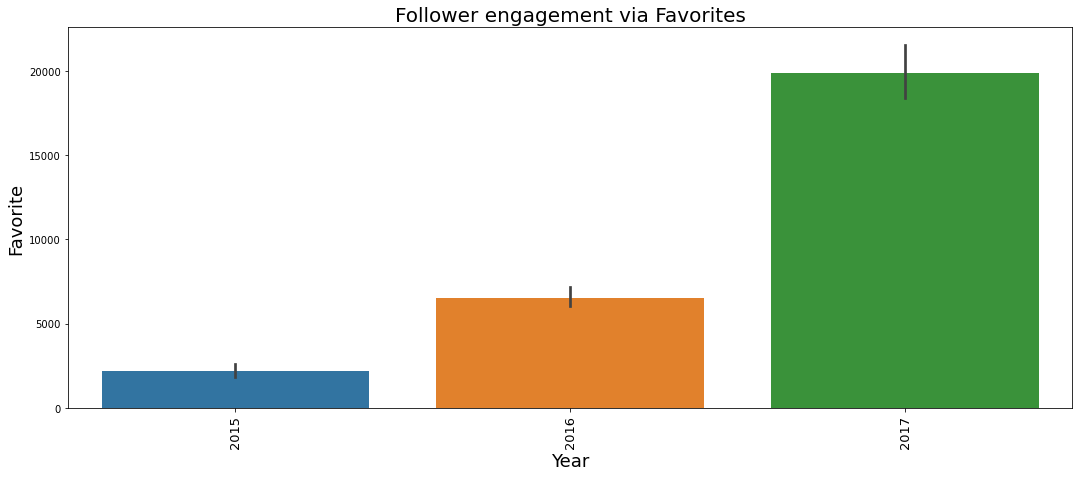

In [89]:
###Follower engagement via favorites
plt.figure(figsize = (18,7))
tweet_favorite = sns.barplot(x = master_data['year'],
                 y = master_data['favorite_count'], data = master_data)
tweet_favorite.set_xticklabels(tweet_favorite.get_xticklabels(),rotation = 90, fontsize = 13);
plt.title('Follower engagement via Favorites', fontsize = 20)
plt.xlabel("Year",fontsize = 18);
plt.ylabel("Favorite",fontsize = 18);

### Follower engagement via retweet in each year 

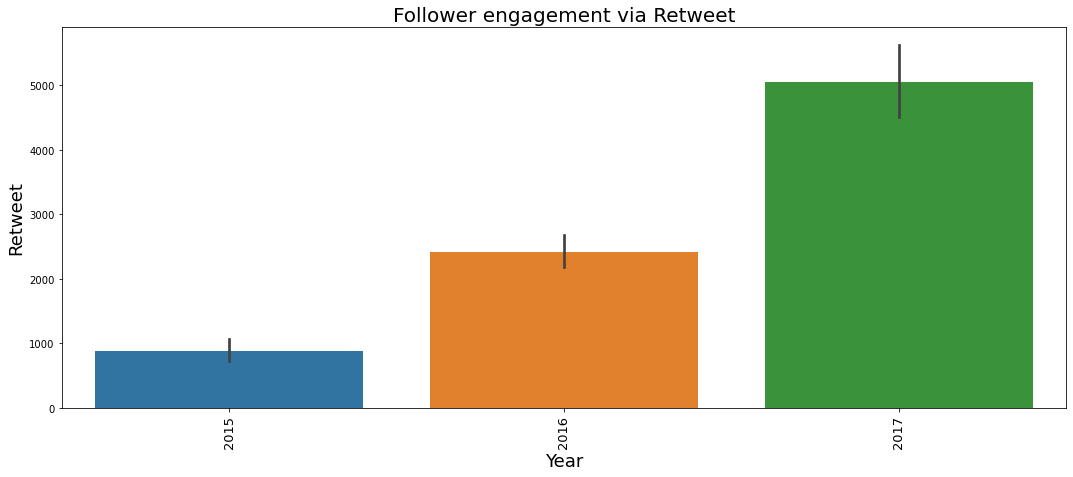

In [90]:
###Follower Engagement via Retweet
plt.figure(figsize = (18,7))
tweet_favorite = sns.barplot(x = master_data['year'],
                 y = master_data['retweet_count'], data = master_data)
tweet_favorite.set_xticklabels(tweet_favorite.get_xticklabels(),rotation = 90, fontsize = 13);
plt.title('Follower engagement via Retweet', fontsize = 20)
plt.xlabel("Year",fontsize = 18);
plt.ylabel("Retweet",fontsize = 18);

### Popular breeds in each year based on predictions

In [91]:
master_data.groupby(['year','breed']).count().retweet_count

year  breed                         
2015  Airedale                          6
      American_staffordshire_terrier    3
      Basenji                           3
      Basset                            5
      Beagle                            9
                                       ..
2017  Vizsla                            2
      Weimaraner                        2
      West_highland_white_terrier       3
      Whippet                           3
      Yorkshire_terrier                 1
Name: retweet_count, Length: 282, dtype: int64

In [92]:
#creating dataframe for 2017
c =master_data['breed'].groupby(master_data['year'][0:377]).value_counts()[1:4]

In [93]:
c.to_frame()

breed
year   breed                    
2017.0 Golden_retriever       33
       Pembroke               22
       Labrador_retriever     20

In [94]:
#creating dataframe for 2016
d =master_data['breed'].groupby(master_data['year'][388:664]).value_counts()[1:4]

In [95]:
d.to_frame()

breed
year   breed                    
2016.0 Golden_retriever       33
       Chow                   15
       Labrador_retriever     15

In [96]:
#creating dataframe for 2015
e = master_data['breed'].groupby(master_data['year'][665:]).value_counts()[1:4]
e.to_frame()

breed
year   breed                    
2015.0 Chihuahua              35
       Golden_retriever       26
       Labrador_retriever     26

In [97]:
#concating to all the dataframes
popular_dogs = pd.concat([e,d,c])
popular_dogs.to_frame()

breed
year   breed                    
2015.0 Chihuahua              35
       Golden_retriever       26
       Labrador_retriever     26
2016.0 Golden_retriever       33
       Chow                   15
       Labrador_retriever     15
2017.0 Golden_retriever       33
       Pembroke               22
       Labrador_retriever     20

Text(0, 0.5, 'Prediction Count')

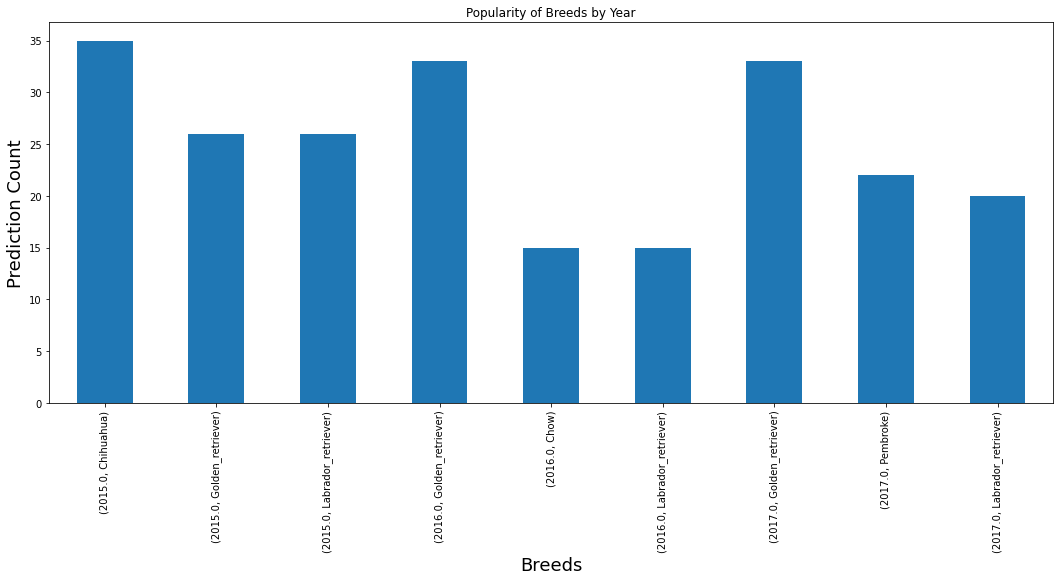

In [98]:
popular_dogs.plot(x='year', y= 'breed', kind = 'bar', figsize = (18,7),
                 title = 'Popularity of Breeds by Year')
plt.xlabel("Breeds",fontsize = 18)
plt.ylabel("Prediction Count",fontsize = 18)